In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib notebook
#%config InlineBackend.figure_format='retina'  # for hi-dpi displays

In [2]:
%run patternlib

In [3]:
d = {
 'Xm': [21, 21.72, 44.87, 68.2, 91.45, 114.72, 137.87, 160.97, 184.04],
 'Ym': [21.72, 44.87, 68.2, 91.45, 114.72, 137.87, 160.97, 184.04],
 'center_x': 0,
 'center_y': 0,
 'dark_all': False,
 'focal': 0.032,
 'grid': True,
 'steer_only': False,
 'nrows': 4,
 'ncols': 12,
 'phase_factor': 82,
 'phase_max': 3.,
 'phase_wrap_neg': True,
 'phase_wrap_pos': False,
 'pitch_x': 25,
 'pitch_y': 25,
 'ref_spot': 0,
 'ref_spot_dark': False,
 'rotation': 1,
 'spotsize': 30.0,
 'steer_horiz': True,
 'steer_lw': 1,
 'steer_pad': 0,
 'steer_vmax': 95,
 'test_pattern': False,
 'wavelen': 532e-09,
 'stretch': True,
}

In [4]:
a = compute_pattern(**d)

<IPython.core.display.Javascript object>


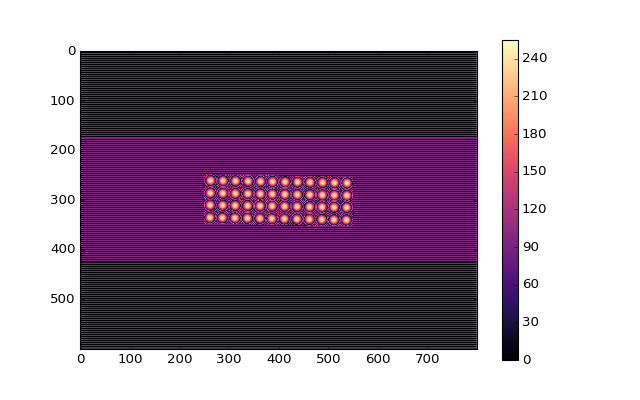

In [5]:
fig, ax = plt.subplots(figsize=(8, 5))
im = plt.imshow(a, interpolation='none', cmap='magma',
                vmin=0, vmax=255)#, norm=mpl.colors.LogNorm(1, 255))
plt.colorbar()
#plt.tight_layout()

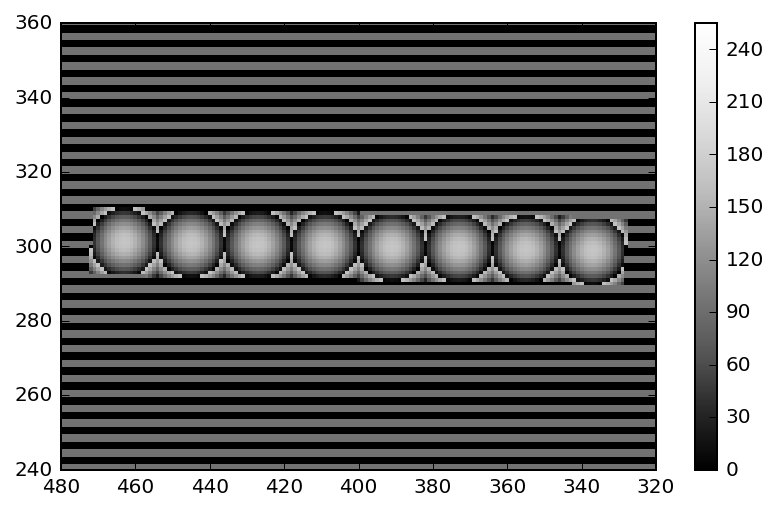

In [69]:
fig, ax = plt.subplots(figsize=(7, 4))
im = plt.imshow(a, interpolation='none', cmap='Greys_r',
                vmin=0, vmax=255)#, norm=mpl.colors.LogNorm(1, 255))
plt.colorbar()
#plt.tight_layout()
plt.xlim(480, 320)
plt.ylim(240, 360)
plt.savefig('pattern.png', bbox_inches='tight', dpi=300)

# Line Pattern

In [5]:
def compute_linepattern(center, width, horiz, 
                        focal, phase_factor, phase_max, phase_wrap_neg, phase_wrap_pos, wavelen):
    a = black_pattern(float)
    if horiz:
        size_para, size_cross = LCOS_X_SIZE, LCOS_Y_SIZE
        a_rot = a
    else:
        size_para, size_cross = LCOS_Y_SIZE, LCOS_X_SIZE
        a_rot = a.T

    delta = width / 2
    xy = np.arange(size_cross) - size_cross // 2
    mask = np.abs(xy - center) < delta
    r = (xy[mask] - center) * LCOS_PIX_SIZE
    phase = phase_max + phase_spherical(r, f=focal, wavelen=wavelen)
    a_rot[mask] = phase[:, np.newaxis]
    a = phase_wrapping(a, phase_max=phase_max, phase_factor=phase_factor,
                       phase_wrap_pos=phase_wrap_pos,
                       phase_wrap_neg=phase_wrap_neg)
    return a.round().astype('uint8')

In [6]:
dl = dict(
    center=100,
    width=30,
    horiz=False,
    focal=0.036,
    phase_factor=82,
    phase_max=3,
    phase_wrap_pos=False,
    phase_wrap_neg=True,
    wavelen=532e-9,
)

In [7]:
a = compute_linepattern(**dl)

<IPython.core.display.Javascript object>


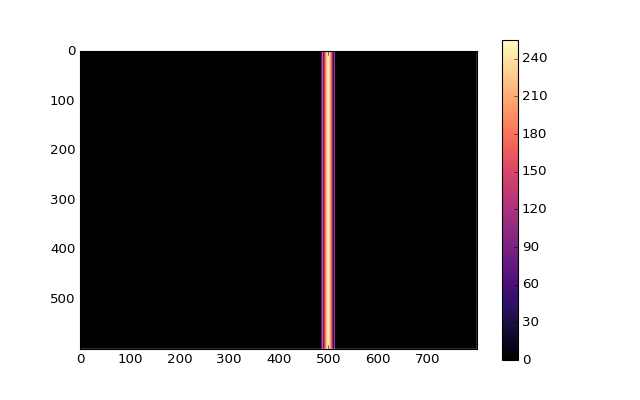

In [8]:
fig, ax = plt.subplots(figsize=(8, 5))
im = plt.imshow(a, interpolation='none', cmap='magma', vmin=0, vmax=255)
plt.colorbar()